In [292]:
import pandas as pd

In [293]:
# Lire les données à partir d'un fichier CSV
data = pd.read_csv('dataset-sell4all.csv')


In [294]:
# Afficher des informations sur les 5 premières lignes
print(df.head())


      Pays  Age    Genre Dépenses des clients
0   France    32  Female               150.50
1  Germany    45    Male               200.75
2    Spain    28  Female                75.25
3    Italy    39    Male               180.00
4       UK    52  Female               250.30


# filter 1

In [295]:
# Supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

# Nettoyer les noms des colonnes
data.columns = data.columns.str.strip()

# Convertir les colonnes 'Age' et 'Dépenses des clients' en valeurs numériques
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Dépenses des clients'] = pd.to_numeric(data['Dépenses des clients'], errors='coerce')

# Supprimer les lignes contenant des valeurs manquantes dans les colonnes 'Age' et 'Dépenses des clients'
data_cleaned = data.dropna(subset=['Age', 'Dépenses des clients'])


# filter 2

In [296]:
# Liste des noms de pays connus
known_countries = [
    'United States', 'Canada', 'United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 
    'Australia', 'Japan', 'China', 'India', 'Brazil', 'South Africa', 'Mexico', 'Argentina',
    'South Korea', 'Russia', 'Netherlands', 'Sweden', 'Norway', 'Denmark', 'USA', 'Finland', 
    'Greece', 'Turkey', 'Portugal', 'Switzerland', 'Belgium', 'Austria', 'Poland', 
    'Ireland', 'New Zealand', 'Singapore', 'Malaysia', 'Thailand', 'Philippines', 'UK', 'Vietnam',
    'Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Israel', 'Jordan', 'Lebanon', 
    'Kuwait', 'Qatar', 'Oman', 'Bahrain', 'Pakistan', 'Bangladesh', 'Sri Lanka', 
    'Ukraine', 'Poland', 'Czech Republic', 'Hungary', 'Slovakia', 'Romania', 'Bulgaria', 
    'Croatia', 'Serbia', 'Bosnia and Herzegovina', 'Montenegro', 'North Macedonia', 
    'Albania', 'Lithuania', 'Latvia', 'Estonia', 'Belarus', 'Moldova', 'Georgia', 'Armenia', 
    'Azerbaijan', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan', 
    'Iraq', 'Syria', 'Yemen', 'Somalia', 'Sudan', 'Libya', 'Morocco', 'Tunisia', 
    'Algeria', 'Mauritania', 'Senegal', 'Ivory Coast', 'Ghana', 'Nigeria', 'Kenya', 
    'Ethiopia', 'Uganda', 'Rwanda', 'Burundi', 'Zambia', 'Zimbabwe', 'Botswana', 'Namibia', 
    'Lesotho', 'Swaziland', 'Malawi', 'Mozambique', 'Angola', 'DR Congo', 'Central African Republic',
    'Chad', 'Niger', 'Mali', 'Mauritania', 'Western Sahara', 'Cape Verde'
]

# Nettoyer les noms des colonnes
data.columns = data.columns.str.strip()

# Filtrer la colonne 'Pays' pour ne conserver que les noms de pays connus
data_cleaned.loc[:, 'Pays'] = data_cleaned['Pays'].apply(lambda x: x if x in known_countries else None)

# Supprimer les lignes contenant des noms de pays inconnus
data_cleaned = data_cleaned[data_cleaned['Pays'].notna()]

# Afficher la liste des noms de pays après nettoyage
unique_countries = data_cleaned['Pays'].unique()

In [297]:
# Afficher un résumé technique des données
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None


### Résumé technique des données

*Nombre de lignes :* 65  
*Nombre de colonnes :* 4  

*Types de données dans les colonnes :*
- *Pays :* Texte (object)
- *Age :* Nombre à virgule flottante (float64)
- *Genre :* Texte (object)
- *Dépenses des clients :* Nombre à virgule flottante (float64)

### Détails de l'affichage technique

- *Nombre de lignes :* Il y a 65 lignes dans l'ensemble de données.
- *Nombre de colonnes :* L'ensemble de données contient quatre colonnes.
  - *Pays :* Noms des pays tels que "France", "Germany", "Spain", etc.
  - *Age :* Âges des personnes pouvant contenir des valeurs numériques valides ou invalides (comme NaN ou ∞).
  - *Genre :* Sexe des personnes tel que "Female" et "Male", avec certaines valeurs inattendues comme "Alien".
  - *Dépenses des clients :* Dépenses des clients contenant des valeurs numériques valides ou invalides (comme "100 Galleons" et "π").

*Remarques sur les données :*
- Les colonnes contiennent des valeurs manquantes ou inattendues telles que NaN et ∞.
- Il y a des valeurs non numériques dans la colonne Dépenses des clients comme "100 Galleons" et "π".
- La colonne Age contient des valeurs non numériques telles que -100 et Not Available.
- La colonne Pays contient des valeurs composée

memory usage: 2.2+ KBs comme "Greece, Italy".

In [298]:
# Calculer la moyenne et la médiane de l'âge après nettoyage des données
mean_age = data_cleaned['Age'].mean()
median_age = data_cleaned['Age'].median()
mean_spending = data_cleaned['Dépenses des clients'].mean()
median_spending = data_cleaned['Dépenses des clients'].median()

# Afficher les résultats avec une mise en forme des nombres
print(f"Âge moyen : {mean_age:.2f}")
print(f"Âge médian : {median_age:.2f}")
print(f"Dépenses moyennes : {mean_spending:.2f}")
print(f"Dépenses médianes : {median_spending:.2f}")


Âge moyen : 37.49
Âge médian : 36.00
Dépenses moyennes : 156.95
Dépenses médianes : 165.00


In [299]:
import matplotlib.pyplot as plt

# filter 3

In [300]:
# Supprimer les lignes où les dépenses sont inférieures à 10 euros
data_cleaned = data_cleaned[data_cleaned['Dépenses des clients'] >= 10]


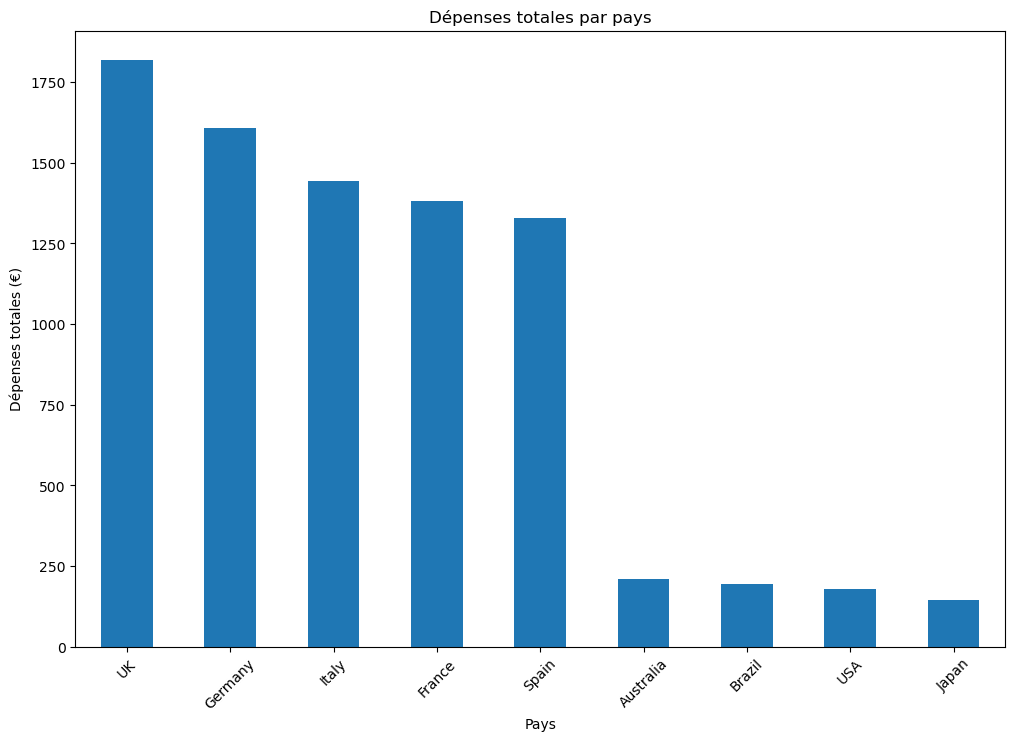

In [301]:
# Préparer les données pour le graphique
data_grouped = data_cleaned.groupby('Pays')['Dépenses des clients'].sum()
data_grouped_sorted = data_grouped.sort_values(ascending=False)  # Trier les valeurs de la plus grande à la plus petite

# Créer un graphique montrant les dépenses par pays
plt.figure(figsize=(12, 8))
data_grouped_sorted.plot(kind='bar')
plt.title('Dépenses totales par pays')
plt.xlabel('Pays')
plt.ylabel('Dépenses totales (€)')
plt.xticks(rotation=45)
plt.show()


In [302]:
# Écrire les données nettoyées dans un nouveau fichier CSV
data_cleaned.to_csv('nettoyees_dataset-sell4all.csv', columns=['Pays', 'Age', 'Genre', 'Dépenses des clients'], index=False)
